In [1]:
import sys
sys.path.insert(1, '/Algoritmos')
from Algoritmos.tcubicos import CubicSplines

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos

# Desarrollo actividad 1

In [2]:
# 1. Importar y organizar los datos dados
with open('Actividad TC/datos/DatosEMA-2020-03-28.csv', 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader) #saltar encabezado
    datos_RAD = list()
    hora = list()
    for line in reader:
        datos_RAD.append(float(line[4]))
        hora.append(line[0][-14:-9])
datos_RAD = datos_RAD[360:1083]
hora = hora[360:1083]
datos = list()
i = 0
for dato in datos_RAD:
    datos.append((i, dato))
    i += 60


In [3]:
#2. Aplicar el método de trazadores cúbicos

matriz_tcubicos = np.array(CubicSplines(datos))
matriz_tcubicos.T

array([[ 9.00000000e-02, -1.07330418e-03,  0.00000000e+00,
         3.72406598e-06],
       [ 8.30000000e-01,  3.91466084e-02,  6.70331876e-04,
        -1.18610706e-05],
       [ 3.03000000e+00, -8.51312928e-03, -1.46466084e-03,
         1.52016980e-05],
       ...,
       [ 1.71000000e+00, -3.60357101e-02, -1.89354515e-04,
         4.32323548e-06],
       [-2.00000000e-01, -1.20673088e-02,  5.88827871e-04,
        -4.42473058e-06],
       [ 2.40000000e-01,  1.08049454e-02, -2.07623634e-04,
         1.15346464e-06]])

Los polinomios del trazador cúbico son:

$s_1(x) = 1.86 + 1.26102289 \cdot 10^{-2} x + 1.91382530\cdot 10^{-6}x^3$

$s_2(x) = 3.03 + 3.32795421 \cdot 10^{-2} (x-60) + 3.44488554\cdot 10^{-4} (x-60)^2+ 1.91382530\cdot 10^{-6} (x-60)^3$

$s_3(x) = 5.24 + 2.32716025 \cdot 10^{-2} (x-120) - 5.11287548\cdot 10^{-4} (x-120)^2 +1.91382530\cdot 10^{-6} (x-120)^3$

$s_4(x) = 5.53 -1.36595210 \cdot 10^{-3} (x-180) + 1.00661638\cdot 10^{-4} (x-180)^2+ 1.91382530\cdot 10^{-6} (x-180)^3$

$s_5(x) = 6.12 + 2.61922059 \cdot 10^{-2} (x-240) + 3.58640996\cdot 10^{-4} (x-240)^2 + 1.91382530\cdot 10^{-6} (x-240)^3$

$...$

$s_{721}(x) = ...$

$s_{722}(x) = ...$

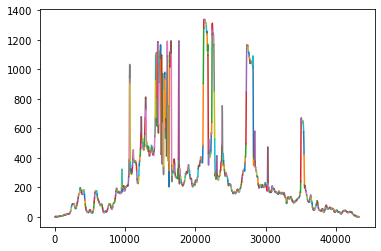

In [4]:
#3. Gráfica
def f_cubica(x, t, a, b, c, d):
    return a + b*(x-t) + c*(x-t)**2 + d*(x-t)**3

fig, ax = plt.subplots()
for i in range(0,722):
    x = np.linspace(60*i, 60*(i + 1), 60)
    ax.plot(x, f_cubica(x, 60*i, matriz_tcubicos.T[i][0], matriz_tcubicos.T[i][1], 
                        matriz_tcubicos.T[i][2],matriz_tcubicos.T[i][3]))

In [5]:
#4. Visualización de los datos
dataset = list()
for i in range(len(matriz_tcubicos.T)):
    dataset.append([hora[i],'{} - {}'.format(datos[i],datos[i + 1]), matriz_tcubicos.T[i][0], 
                    matriz_tcubicos.T[i][1], matriz_tcubicos.T[i][2], matriz_tcubicos.T[i][3]])
m_coeficientes = pd.DataFrame(dataset, columns=['HORA','SEG / RAD', 'a_0', 'a_1', 'a_2', 'a_3']).set_index('HORA')
m_coeficientes

SEG / RAD   a_0           a_1           a_2  \
HORA                                                                     
06:00         (0, 0.09) - (60, 0.83)  0.09 -0.0010733042  0.0000000000   
06:01       (60, 0.83) - (120, 3.03)  0.83  0.0391466084  0.0006703319   
06:02      (120, 3.03) - (180, 0.53)  3.03 -0.0085131293 -0.0014646608   
06:03      (180, 0.53) - (240, 1.71)  0.53 -0.0200940912  0.0012716448   
06:04      (240, 1.71) - (300, 1.56)  1.71  0.0228894942 -0.0005552517   
...                              ...   ...           ...           ...   
17:57  (43020, 0.98) - (43080, 2.59)  0.98  0.0056951126  0.0008733271   
17:58  (43080, 2.59) - (43140, 1.71)  2.59  0.0167101494 -0.0006897431   
17:59  (43140, 1.71) - (43200, -0.2)  1.71 -0.0360357101 -0.0001893545   
18:00  (43200, -0.2) - (43260, 0.24) -0.20 -0.0120673088  0.0005888279   
18:01  (43260, 0.24) - (43320, 0.39)  0.24  0.0108049454 -0.0002076236   

                a_3  
HORA                 
06:00  0.0000037241  
06:01 -0.0000118611  
06:02  0.0000152017  
06:03 -0.0000101494  
06:04  0.0000022016  
...             ...  
17:57 -0.0000086837  
17:58  0.0000027799  
17:59  0.0000043232  
18:00 -0.0000044247  
18:01  0.0000011535  

[722 rows x 5 columns]